<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Замена-типов-данных" data-toc-modified-id="Замена-типов-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Замена типов данных</a></span></li><li><span><a href="#Поиск-и-справление-ошибок" data-toc-modified-id="Поиск-и-справление-ошибок-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Поиск и справление ошибок</a></span></li><li><span><a href="#Расчет-данных" data-toc-modified-id="Расчет-данных-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Расчет данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотиз" data-toc-modified-id="Проверка-гипотиз-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотиз</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Определение перспективного тарифа для телеком-компании

## Описание проекта

**Заказчик исследования** 

Компании «Мегалайн» — федерального оператора сотовой связи. 

**Задача**

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

**Данные**

Данные о 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

## Обзор данных

In [1]:
# импорт библиотек
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
#сохраняем путь к файлу на сервере Практикума
server_path_calls = '/datasets/calls.csv' 
server_path_internet = '/datasets/internet.csv'
server_path_messages = '/datasets/messages.csv'
server_path_tariffs = '/datasets/tariffs.csv'
server_path_users = '/datasets/users.csv'

#сохраняем путь к файлу на компьютере
local_path_mkrf_movies = 'datasets/mkrf_movies.csv'   
local_path_calls = 'datasets/calls.csv' 
local_path_internet = 'datasets/internet.csv'
local_path_messages = 'datasets/messages.csv'
local_path_tariffs = 'datasets/tariffs.csv'
local_path_users = 'datasets/users.csv'


try:                                                   #пробуем найти данные по сетевому адресу
    calls = pd.read_csv(server_path_calls) 
    internet = pd.read_csv(server_path_internet)
    messages = pd.read_csv(server_path_messages)
    tariffs = pd.read_csv(server_path_tariffs)
    users = pd.read_csv(server_path_users)
except:                                                #если не находим по сетевому, ищем по локальному
    calls = pd.read_csv(local_path_calls) 
    internet = pd.read_csv(local_path_internet)
    messages = pd.read_csv(local_path_messages)
    tariffs = pd.read_csv(local_path_tariffs)
    users = pd.read_csv(local_path_users)   

In [3]:
datesets = {              #словарь датасетов
    'Пользователи': [users, 'churn_date', 'reg_date'],
    'Звонки': [calls, 'call_date'],
    'Трафик': [internet, 'session_date'],   
    'Сообщения': [messages, 'message_date'], 
    'Тарифы': [tariffs]
}

In [4]:
for key, val in datesets.items(): #отображение всех датасетов
    print(f'Датасет: {key}')
    display(val[0].head())
    val[0].info()
    print()  

Датасет: Пользователи


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

Датасет: Звонки


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB

Датасет: Трафик


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB

Датасет: Сообщения


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB

Датасет: Тарифы


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes



## Подготовка данных

### Замена типов данных

В датасетах:
- Пользователи,
- Звонки,
- Трафик,
- Сообщения,

изменим тип данных колонок содержащих дату на тип `datetime` 

In [5]:
for key, val in datesets.items(): #цикл для изменения типов данных на datetime всех датасетов
    if len(val) > 1: #проверка наличия датасете колонки для изменения
        for i in range(1, len(val)):
            val[0][val[i]] = pd.to_datetime(val[0][val[i]], format='%Y-%m-%d')
        print(f'Датасет: {key}')    
        val[0].info()
        print()

Датасет: Пользователи
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB

Датасет: Звонки
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   

### Поиск и справление ошибок

In [6]:
calls['duration'].describe()

count    202607.000000
mean          6.755887
std           5.843365
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

In [7]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

In [8]:
internet[internet['mb_used'] == 0].count()

Unnamed: 0      19598
id              19598
mb_used         19598
session_date    19598
user_id         19598
dtype: int64

Проверил 
1. Датасет `users`:
- user_id - дубликатов нет все в проядки,
- age - от 18 до 75, аномалий нет,
- churn_date - значения Nat в рамках логики данных,
- city - проверил на уникальные значения все хорошо,
- first_name, last_name - значения для исследования не важны,
- reg_date - все хорошо,
- tariff - два уникальных значения 'ultra', 'smart'.
2. Датасет `calls`
- duration - есть нулевые значения, описание которых есть это пропущенные звонки, длительность тоже не сильно смущает максимальное значение 38, медиана и среднее близки что говорит об отсутсвии выбросов и аномалий.
3. Датасет `internet`
- Unnamed: 0 - не описанная колонка, значение это чать id записи после `_`, смысловая нагрузка не ясна, можно удалить,
- mb_used - для 19598 записей (14% от всего датасета) установлены нулевые значения, что это не описано, может быть это не тарифицированные данные например приложение мобильного оператора или другие сервисы, сказать невозможно, заполнять средними или медианами опасно. Медианное и среднее значение относительно близки среднее чуть больше данные скошаны в право (большое количество 0 значений)  

Лишние строчки кода убрал

In [9]:
internet = internet.drop(columns='Unnamed: 0')

In [10]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


### Расчет данных 

Для каждого пользователя:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя 

In [11]:
user_calls = calls.assign( # количество сделанных звонков и израсходованных минут разговора по месяцам
    month=lambda x: x.call_date.dt.month
).assign(
    duration_ceil=lambda x: np.ceil(x.duration)
).pivot_table(
    index=['user_id', 'month'],
    values='duration_ceil',
    aggfunc=['count', 'sum']
)
user_calls.columns = ['call_count', 'call_sum'] # преименование для ухода от двойного наименования

In [12]:
user_calls.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   call_count  3174 non-null   int64  
 1   call_sum    3174 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 62.9 KB


In [13]:
user_messages = messages.assign( # количество отправленных сообщений по месяцам
    month=lambda x: x.message_date.dt.month
).pivot_table(
    index=['user_id', 'month'],
     values='id',
    aggfunc='count'
)
user_messages.columns = ['messages_count'] # замена на более понятное название

In [14]:
user_messages.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2717 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   messages_count  2717 non-null   int64
dtypes: int64(1)
memory usage: 32.7 KB


In [15]:
user_internet = internet.assign( # количество сделанных звонков и израсходованных минут разговора по месяцам
    month=lambda x: x.session_date.dt.month
).pivot_table(
    index=['user_id', 'month'],
    values='mb_used',
    aggfunc='sum'
).assign(
    gb_used=lambda x: np.ceil(x.mb_used / 1024)
)
user_internet.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, 5) to (1499, 12)
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   mb_used  3203 non-null   float64
 1   gb_used  3203 non-null   float64
dtypes: float64(2)
memory usage: 63.5 KB


In [16]:
user_all = user_messages.merge( # объединение всех посчитанных данных
    user_internet,
    how='outer',
    on=['user_id', 'month']
).merge(
    user_calls,
    how='outer',
    on=['user_id', 'month']
).merge( 
    users[['user_id', 'city', 'tariff']],
    how='inner',
    on='user_id'
).fillna(0) # заполним нулями пропуски от объединения

In [17]:
for column in [['call_sum', 'call_count','messages_count','gb_used']]: # изменим числовой тип на int
    user_all[column] = user_all[column].astype('int64')
user_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   messages_count  3214 non-null   int64  
 2   mb_used         3214 non-null   float64
 3   gb_used         3214 non-null   int64  
 4   call_count      3214 non-null   int64  
 5   call_sum        3214 non-null   int64  
 6   city            3214 non-null   object 
 7   tariff          3214 non-null   object 
dtypes: float64(1), int64(5), object(2)
memory usage: 226.0+ KB


In [18]:
for tariff in user_all['tariff'].unique(): # считаем затраты на связь для каждого тарифа
    
    # из таблицы tariffs вычисляем (стоимость тарифа, сколько включено в тариф сообщений минут и gb, и цену превышения)
    rub_monthly_fee = int(tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_monthly_fee']) 
    messages_included = int(tariffs.loc[tariffs['tariff_name'] == tariff, 'messages_included'])
    gb_included = int(tariffs.loc[tariffs['tariff_name'] == tariff, 'mb_per_month_included']) / 1024
    minutes_included = int(tariffs.loc[tariffs['tariff_name'] == tariff, 'minutes_included'])
    rub_per_gb = int(tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_per_gb'])
    rub_per_message = int(tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_per_message'])
    rub_per_minute = int(tariffs.loc[tariffs['tariff_name'] == tariff, 'rub_per_minute'])
   
    # вычисляем новый столбец
    user_all.loc[user_all['tariff'] == tariff, 'expenses'] = rub_monthly_fee + user_all['gb_used'].apply(
        lambda x: 0 if x <= gb_included else x - gb_included
    ) * rub_per_gb + user_all['messages_count'].apply(
        lambda x: 0 if x <= messages_included else x - messages_included
    ) * rub_per_message + user_all['call_sum'].apply(
        lambda x: 0 if x <= minutes_included else x - minutes_included
    ) * rub_per_minute

In [19]:
user_all.query('expenses > 1950').head(20) # проверка что считает правильно

,user_id,messages_count,mb_used,gb_used,call_count,call_sum,city,tariff,expenses
54,1009,14,24725.84,25,22,183,Пермь,smart,2550.0
55,1009,9,23708.41,24,33,249,Пермь,smart,2350.0
68,1011,12,25300.98,25,65,501,Самара,smart,2553.0
69,1011,6,22870.72,23,58,361,Самара,smart,2150.0
72,1012,10,26607.35,26,43,316,Санкт-Петербург,smart,2750.0
73,1012,15,24741.16,25,29,219,Санкт-Петербург,smart,2550.0
74,1012,12,23090.75,23,43,223,Санкт-Петербург,smart,2150.0
77,1012,13,29071.87,29,48,451,Санкт-Петербург,smart,3350.0
83,1014,48,25040.50,25,31,180,Чебоксары,smart,2550.0
84,1014,39,27823.59,28,40,300,Чебоксары,smart,3150.0


## Анализ данных

1. Вычисления среднего количества, дисперсии и стандартного отклонения по минутам разговора, количеству сообщений и объему интернет-трафика.
2. Построение гистограмм.
3. определение распределения.

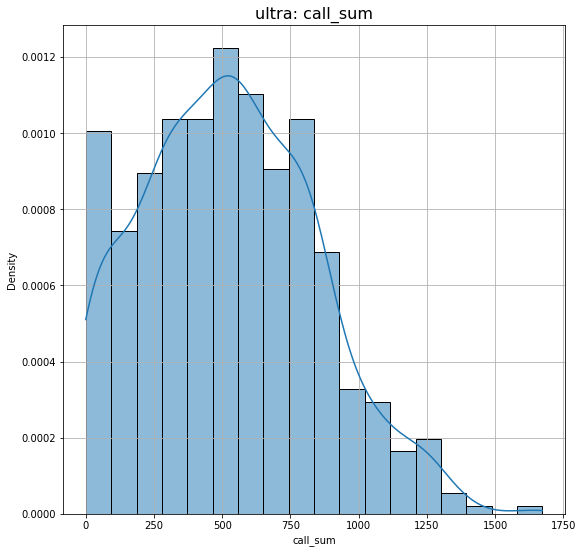

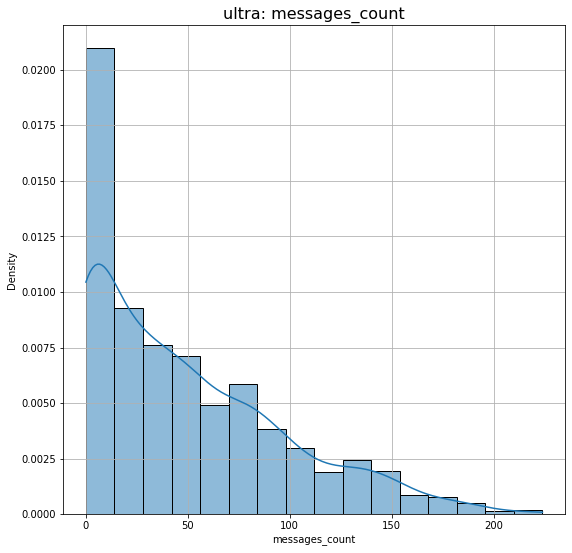

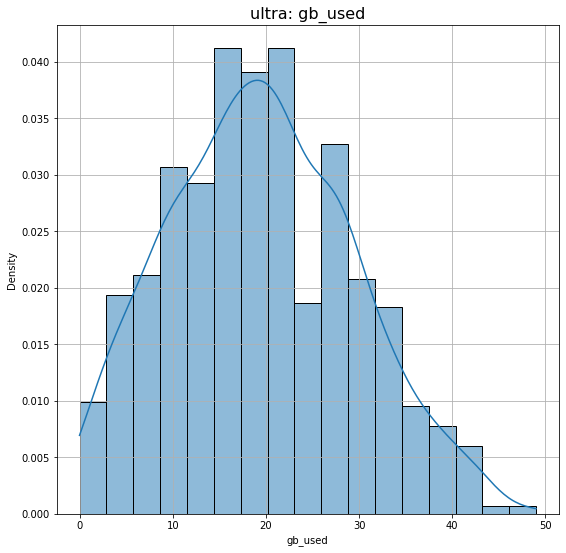

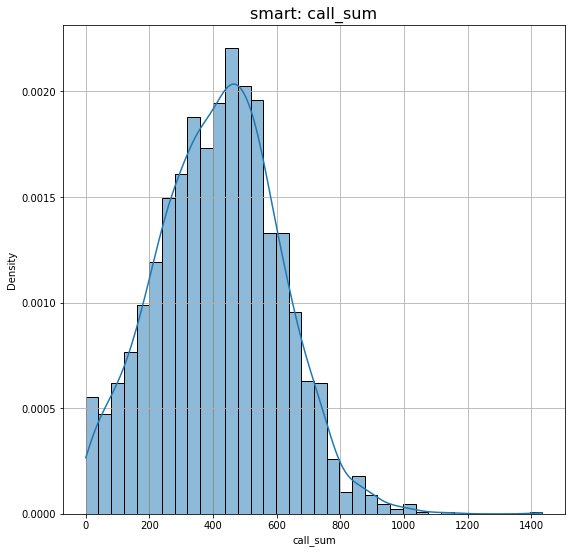

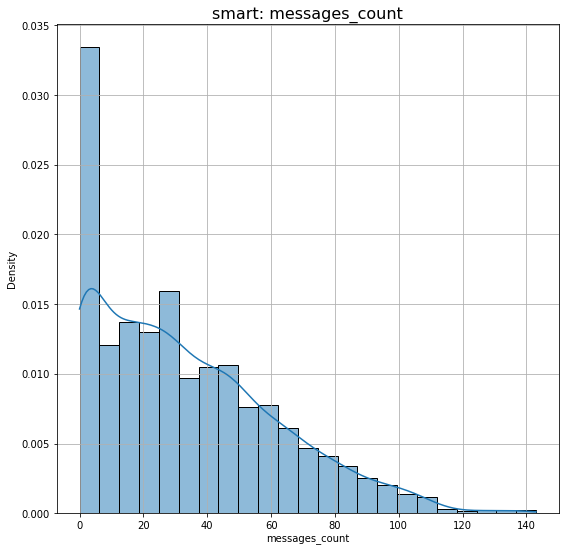

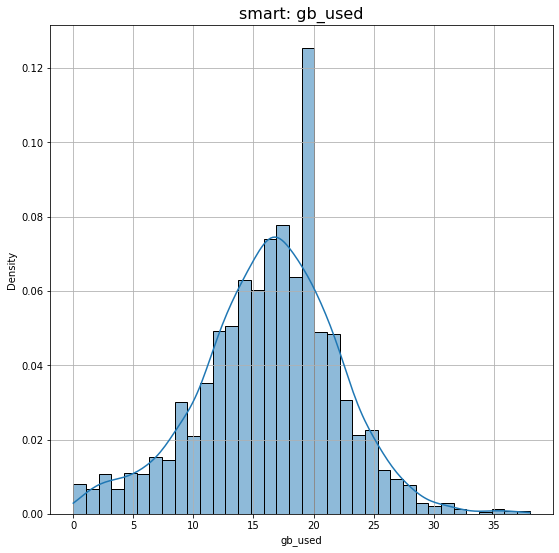

In [20]:
pd.options.display.float_format = '{:.2f}'.format # формат вывода целочисленных данных

col = [
    'tariff',
    'call_mean',
    'call_var',
    'call_std',
    'messages_mean',
    'messages_var',
    'messages_std',
    'traffic_mean',
    'traffic_var',
    'traffic_std'
]

data = []
data_tariff = []

for tariff in user_all['tariff'].unique(): # цикл по тарифам
    user_tariff = user_all.loc[user_all['tariff'] == tariff]
    data_tariff = []
    data_tariff.append(tariff) 
    for column in ['call_sum', 'messages_count','gb_used']: # цикл по колонкам
        data_tariff.append(
            np.mean(user_tariff[column])
        )
        data_tariff.append(
            np.var(user_tariff[column], ddof=1)
        )
        data_tariff.append(
            np.std(user_tariff[column], ddof=1)
        )
        plt.subplots(figsize=(9, 9))
        plt.title(f'{tariff}: {column}', fontsize=16)
        sns.histplot(      # гистограммы плотности
            user_tariff[column], 
            kde=True,
            stat="density", 
            linewidth=1)
        plt.grid(True)
        plt.show()
    data.append(data_tariff)        

In [21]:
pd.DataFrame(data=data, columns=col) #вывод характеристик

,tariff,call_mean,call_var,call_std,messages_mean,messages_var,messages_std,traffic_mean,traffic_var,traffic_std
0,ultra,526.62,100873.63,317.61,49.36,2285.27,47.80,19.49,97.09,9.85
1,smart,417.93,36219.32,190.31,33.38,796.81,28.23,16.33,33.03,5.75


Выводы:
1. Распределения по отправленным сообщениям сильно скошено в право, это посути пуасоновское распределение, много значений близких к 0 (0, 1, 2) для обоих тарифных планов, эта услуга не пользуется особой популярностью. 
2. Звонки:
 - Тариф "Ультра" - скошена распределение в право, среднее 526 и как видно единицы не используют даже половину лимита, в этом компоненте, он не оптимален.
 - Тариф "Смарт" - скошена распределение в право, средне 417, многим этого не хватает лимита.
3. Интернет - Очень близкие к нормальным распределения:
  - Тариф "Ультра" - этот тариф выбирается именно из-за наличия дополнительного интернета, и многом этого не хватает (13%) 
  - Тариф "Смарт" - среднее больше лимита, пользователи предпочитают переплатить за израсходованный трафик чем переплачивать за ненужные смс и минуты.

Поведение пользователей не так уж и отличается, по описанию тарифов их запросы должны были отличаться силнее:
- пользователям обоих тарифов не хватает интернет-трафика,
- почти не пользуются смс,
- звонкам есть разница, но не в разы. 

## Проверка гипотиз

H0: Среднее значение выручки по герельной совокупности №1 =  Среднее значение выручки по герельной совокупности №2

H1:  Среднее значение выручки по герельной совокупности №1 ≠  Среднее значение выручки по герельной совокупности №2

герельной совокупности №1 - все пользователи тарифа "Ултра"

герельной совокупности №2 - все пользователи тарифа "Смарт"

Зависимости двух генеральных совокупностей нет.

In [22]:
alpha = 0.05

results = st.ttest_ind(
    user_all.loc[user_all['tariff'] == 'ultra']['expenses'],
    user_all.loc[user_all['tariff'] == 'smart']['expenses'],
    equal_var = False
)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print(results.pvalue)

for tariff in user_all['tariff'].unique():
    mean = np.mean(user_all.loc[user_all['tariff'] == tariff]['expenses'])
    print(f'Среднее значение выручки по выборке для {tariff}: {mean:.2f}')

Отвергаем нулевую гипотезу
4.2606313931076085e-250
Среднее значение выручки по выборке для ultra: 2070.15
Среднее значение выручки по выборке для smart: 1289.97


Статистически значимые различия обнаружены 

H0: Среднее значение выручки по герельной совокупности №1 =  Среднее значение выручки по герельной совокупности №2

H1:  Среднее значение выручки по герельной совокупности №1 ≠  Среднее значение выручки по герельной совокупности №2

герельной совокупности №1 - все пользователи обоих тарифов из Москвы

герельной совокупности №2 - все пользователи обоих тарифов не из Москвы

Зависимости двух генеральных совокупностей нет.

In [23]:
alpha = 0.05

results = st.ttest_ind(
    user_all.loc[user_all['city'] == 'Москва']['expenses'],
    user_all.loc[user_all['city'] != 'Москва']['expenses']
)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


msw_mean = np.mean(user_all.loc[user_all['city'] == 'Москва']['expenses'])
rus_mean = np.mean(user_all.loc[user_all['city'] != 'Москва']['expenses'])
print(f'Среднее значение выручки по выборке для Москвы: {msw_mean:.2f}')
print(f'Среднее значение выручки по выборке для других регионов: {rus_mean:.2f}')

Не получилось отвергнуть нулевую гипотезу
Среднее значение выручки по выборке для Москвы: 1546.71
Среднее значение выручки по выборке для других регионов: 1524.94


Статистически значимые различия не обнаружены 

## Выводы

1. Пользователи тарифа "Смарт" переплачивают за перерасход интернет-трафика, в также за звонки и очень редко за смс,  что увеличивает оплаты за месяц значение среднего по выборки, более чем в два раза.
2. Пользователи тарифа "Ултра" тоже переплачивают за перерасход интернет-трафика, но не так существенно, но они вообще не приплачивают за смс и минуты.
3. Пользователи как в Москве, так и в других регионах не отличаются тратами на связь, оснований для отвержения H0 нет.
4. Какой тариф - лучше интересный вопрос, смотря для кого:
 - Для компании "Мегалайн" тарифа "Смарт" - лучший, его выбирают большинство клиентов, т.к. они не хотя переплачивать за ненужные смс и минуты, но попадают в ловушку и перепалывают за интернет, хотя их потребление не сильно отличается от тарифа "Ультра"
 - "Ультра" - лучше для потребителя они могут проще контролировать свои расходы на связь, но почти не пользуются 2/3 предложенных услуг в полной объеме.

Может стоит ввести 3 тариф
С лимитом:
по трафику в - 20 Гб,
по сообщениям – 100, 
по минутам – 600,

Стоимостью - 1250 рублей